In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

ROOT = "c:\\Users\\1004c\\Desktop\\통계청 논문 공모전"

## Interval

In [6]:
# Load uploaded files
rf_df = pd.read_csv(os.path.join(ROOT, "Data", "T1_Y1", "T1_mean_RF_reg.csv"))
bart_df = pd.read_csv(os.path.join(ROOT, "Data", "T1_Y1", "T1_mean_BART_reg.csv"))
boosting_df = pd.read_csv(os.path.join(ROOT, "Data", "T1_Y1", "T1_mean_Boosting_reg.csv"))

In [7]:
# 1. 모델별 데이터프레임 준비
rf_df["model"] = "Random Forest"
bart_df["model"] = "BART"
boosting_df["model"] = "Boosting"

# 2. 하나로 합치기
df_all = pd.concat([rf_df, bart_df, boosting_df], ignore_index=True)

# 3. interval_length 계산 (혹시 안 되어 있다면)
df_all["Interval Length"] = df_all["upper"] - df_all["lower"]

C:\Users\1004c\AppData\Local\Temp\ipykernel_21824\1531032323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="model", y="Interval Length", palette="Set2")


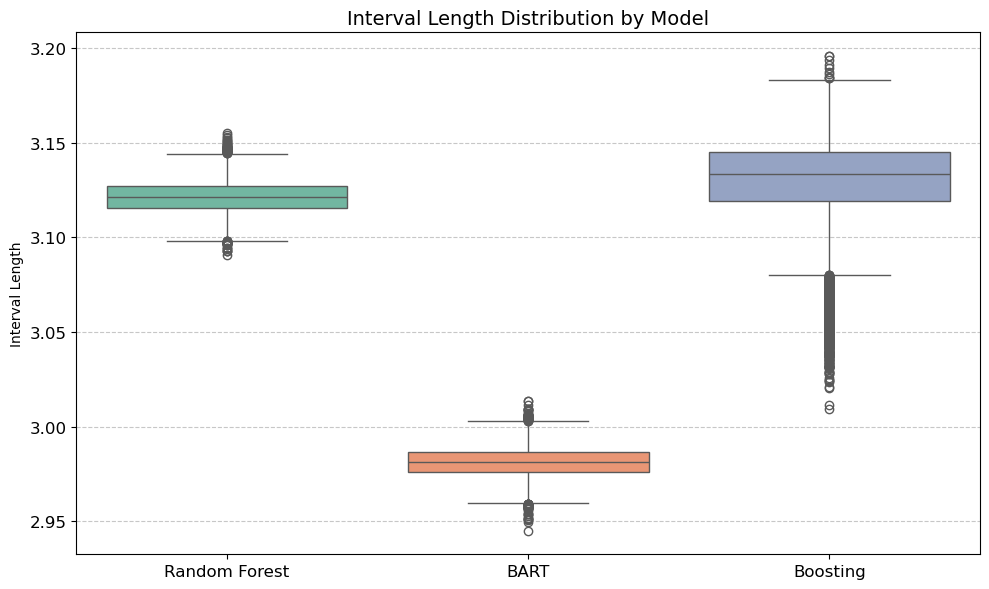

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x="model", y="Interval Length", palette="Set2")
plt.title("Interval Length Distribution by Model", fontsize=14)
plt.xlabel("")
plt.ylabel("Interval Length")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Lower bound

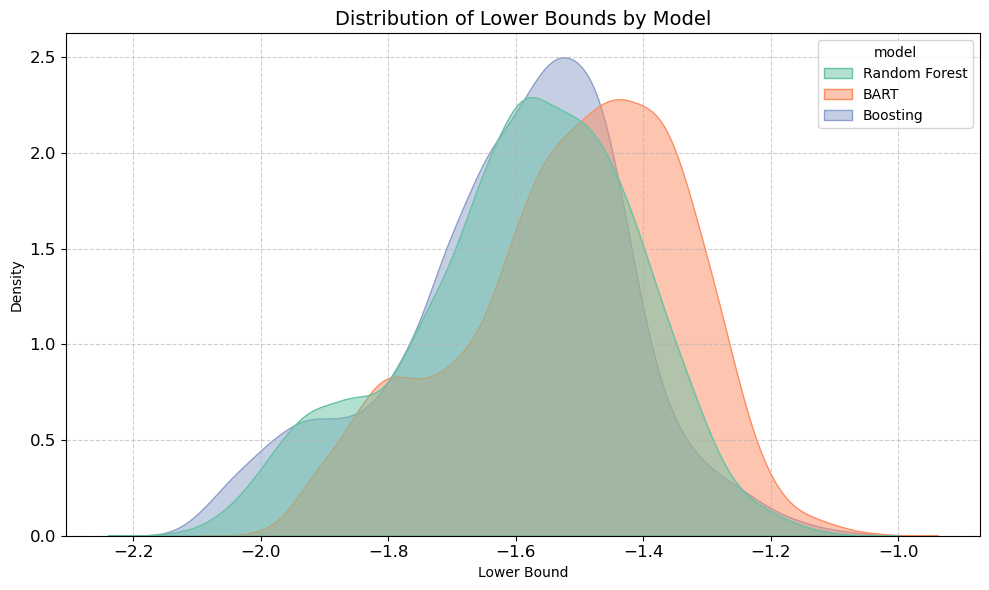

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_all, x="lower", hue="model", fill=True, common_norm=False,
            palette=["#66c2a5", "#fc8d62", "#8da0cb"], alpha=0.5)
plt.xlabel("Lower Bound")
plt.ylabel("Density")
plt.title("Distribution of Lower Bounds by Model", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

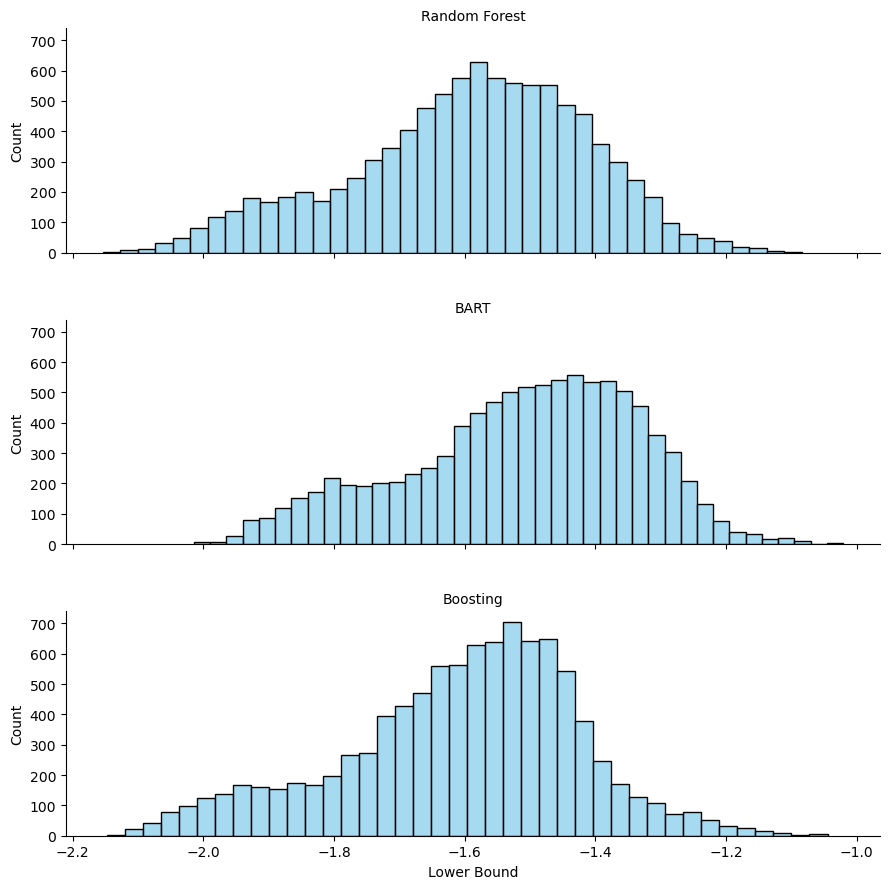

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# FacetGrid: 각 모델별 히스토그램 세로 정렬
g = sns.FacetGrid(df_all, row="model", height=3, aspect=3, sharex=True)
g.map(sns.histplot, "lower", bins=40, color="skyblue", edgecolor="black")

# 제목 및 축 정리
g.set_axis_labels("Lower Bound", "Count")
g.set_titles(row_template="{row_name}")
plt.subplots_adjust(hspace=0.3)
plt.show()


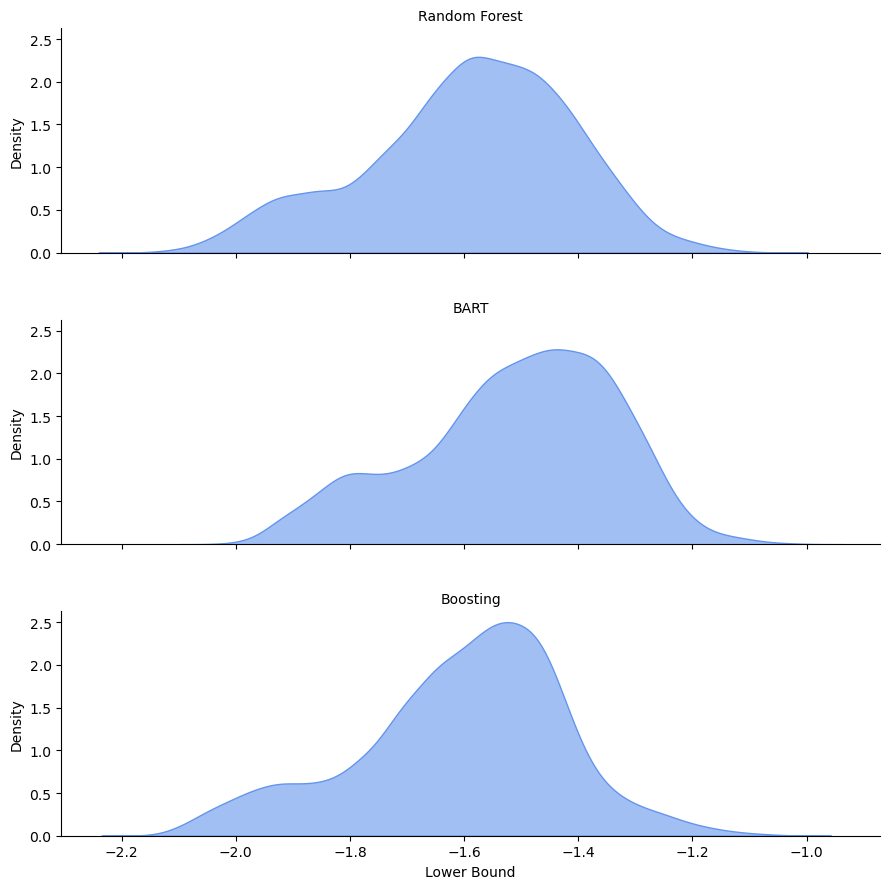

In [11]:
g = sns.FacetGrid(df_all, row="model", height=3, aspect=3, sharex=True)
g.map(sns.kdeplot, "lower", fill=True, color="cornflowerblue", alpha=0.6)
g.set_axis_labels("Lower Bound", "Density")
g.set_titles(row_template="{row_name}")
plt.subplots_adjust(hspace=0.3)
plt.show()
